Optimized d3:  0.35756775856413586
Optimized q values for 1pct-brch-1000PgC:  0.38968079484919405 0.18731182226353715 1.8498204432921388
Optimized d3:  0.7071583104757975
Optimized q values for 1pct-brch-2000PgC:  0.625580882087208 6.800819464192465e-15 1.9595282419166329


/var/folders/dd/n_9wp4x11tn45bzqgcwvt_pr0000gp/T/ipykernel_33157/2614596633.py:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)


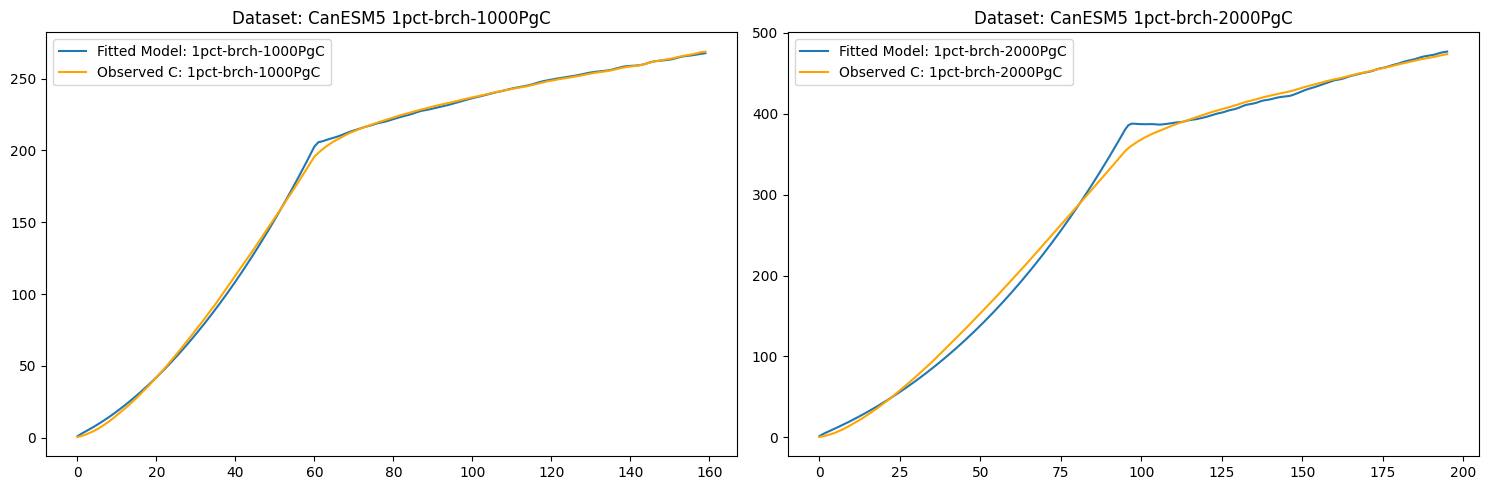

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.lib import recfunctions
from scipy.optimize import curve_fit


# Define the step temperature function
def step_temperature_e(S_old, F, q, d, dt=1):
    decay_factor = np.exp(-dt / d)
    S_new = q * F * (1 - decay_factor) + S_old * decay_factor
    T = np.sum((S_old + S_new) / 2)
    return S_new, T

# Define the fitting function

def only_leave_params_to_be_set(time, alpha, beta, gamma, delta, conc_access_data):
    q_test = np.array([0.180 * alpha, 0.297 * beta, 0.386 * gamma])  # q values
    d_test = np.array([0.903, 7.92, 355 * delta])
    C_test_values = np.array(conc_access_data - 280, dtype=float)
    C_output = np.zeros(len(C_test_values), dtype=float)

    S_test, C_output[0] = step_temperature_e(S_old=0, F=np.sum(C_test_values[0]), q=q_test, d=d_test, dt=1)

    for t in range(1, len(C_test_values)):
        S_test, C_output[t] = step_temperature_e(S_old=S_test, F=np.sum(C_test_values[t]), q=q_test, d=d_test, dt=1)

    return C_output.astype(float)

# Load data
datasets = ['1pct-brch-1000PgC', '1pct-brch-2000PgC']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/CanESM5/CanESM/fgco2_CanESM5_esm-1pct-brch-1000PgC_1851_2010.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/CanESM5/CanESM/fgco2_CanESM5_esm-1pct-brch-2000PgC_1947_2010.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/CanESM5/CanESM/co2_CanESM5_esm-1pct-brch-1000PgC_1851_2010.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/CanESM5/CanESM/co2_CanESM5_esm-1pct-brch-2000PgC_1947_2010.csv', index_col=0).to_numpy().flatten(),
}

q_values_df = pd.DataFrame(columns=['Dataset', 'Experiment', 'q1', 'q2', 'q3'])

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(15, 5))

bounds = (0, [np.inf, np.inf, np.inf, np.inf])
p0=[1, 1, 1, 1]

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['CanESM5'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: CanESM5 {label}')
    ax[i].legend()
    

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Dataset: CanESM5')
plt.show()



Optimized d3:  64.23959639731395
Optimized q values for 1pctCO2:  0.8980709389832052 6.726724660838068e-11 1.2551904617383776e-09
Optimized d3:  0.399295297177018
Optimized q values for 1pct-brch-1000PgC:  0.5048379585357883 0.15569965213895787 2.0343322724329584
Optimized d3:  0.35292483607753955
Optimized q values for 1pct-brch-750PgC:  0.27687872630427557 0.37942471085511237 2.1210981279463326
Optimized d3:  3564.5444339954706
Optimized q values for 1pct-brch-2000PgC:  0.7889235436882618 2.0423514947877937e-32 5365.337628289026


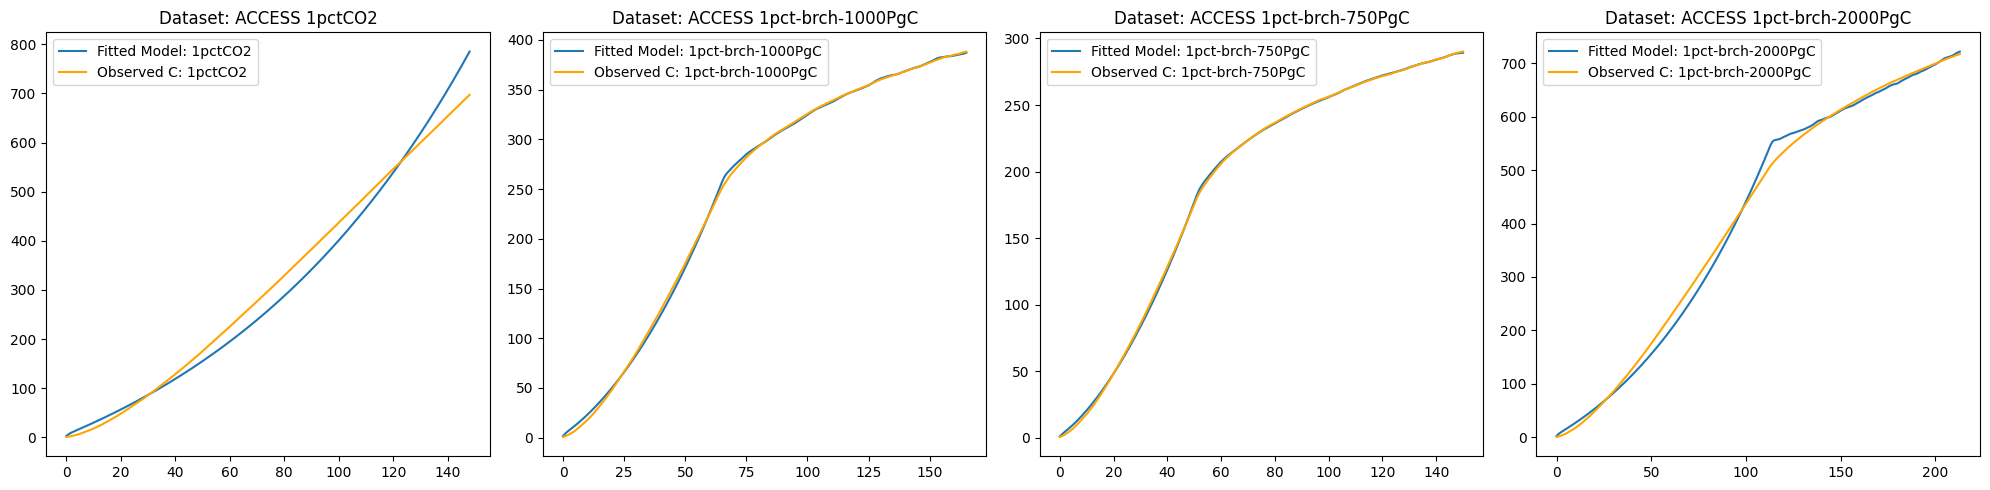

In [358]:


# Load data
datasets = ['1pctCO2', '1pct-brch-1000PgC', '1pct-brch-750PgC', '1pct-brch-2000PgC']

fgco2 = {
    '1pctCO2': pd.read_csv('all_zecmip/ACCESS/ACCESS_1pct/fgco2_ACCESS-ESM1.5_A1_1-150.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/ACCESS/ACCESS_A1/fgco2_ACCESS-ESM1.5_esm-1pct-brch-1000PgC_68-167.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/ACCESS/ACCESS_A2/fgco2_ACCESS-ESM1.5_esm-1pct-brch-750PgC_54-153.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/ACCESS/ACCESS_A3/fgco2_ACCESS-ESM1.5_esm-1pct-brch-2000PgC_116-215.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pctCO2': pd.read_csv('all_zecmip/ACCESS/ACCESS_1pct/co2_ACCESS-ESM1.5_A1_1-150.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/ACCESS/ACCESS_A1/co2_ACCESS-ESM1.5_esm-1pct-brch-1000PgC_68-167.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/ACCESS/ACCESS_A2/co2_ACCESS-ESM1.5_esm-1pct-brch-750PgC_54-153.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/ACCESS/ACCESS_A3/co2_ACCESS-ESM1.5_esm-1pct-brch-2000PgC_116-215.csv', index_col=0).to_numpy().flatten(),
}


# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(20, 5))



for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['ACCESS'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    
    
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: ACCESS {label}')
    ax[i].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Dataset: ACCESS')
plt.show()


Optimized d3:  0.5168356903182578
Optimized q values for 1pct-brch-1000PgC:  0.39646131446880656 0.17086566737792477 2.278919033506577


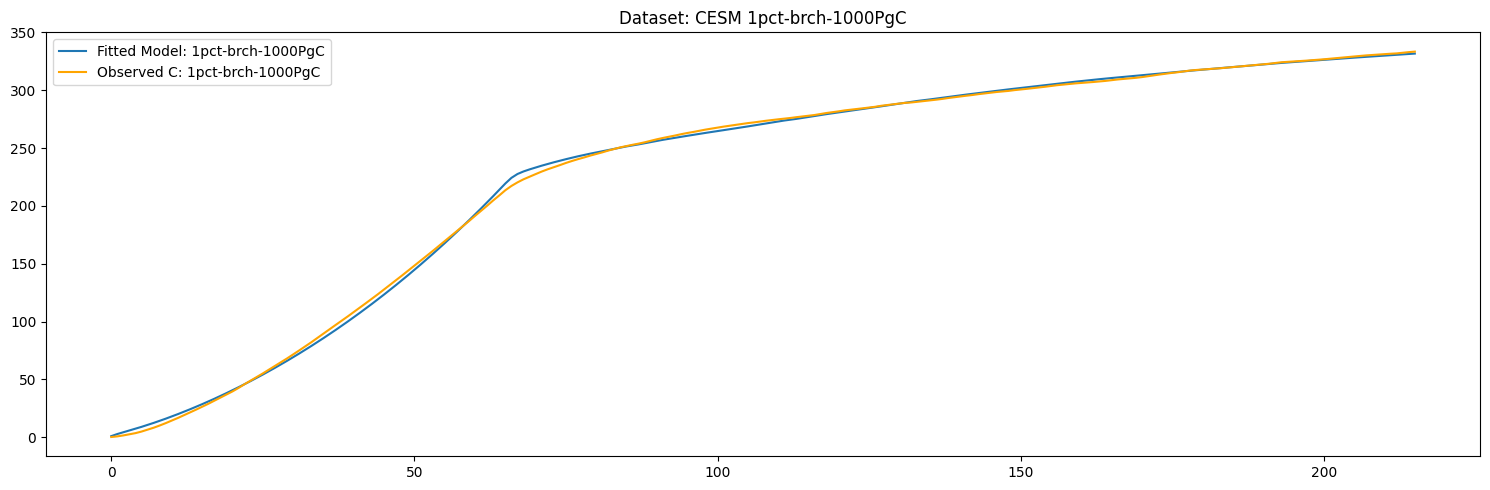

In [359]:


# Load data
datasets = ['1pct-brch-1000PgC']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/CESM/CESM_A1/fgco2_cesm2_esm-1pct-brch-1000PgC_0001_0150.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/CESM/CESM_A1/co2_cesm2_esm-1pct-brch-1000PgC_0001_0150.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(15, 5))



for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['CESM'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax.plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax.plot(time, C, 'orange', label=f'Observed C: {label}')
    ax.set_title(f'Dataset: CESM {label}')
    ax.legend()
    

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Dataset: CESM')
plt.show()



Optimized d3:  0.6035124698162246
Optimized q values for 1pct-brch-1000PgC:  0.4056499882312011 0.17528824469182255 3.2431711171852053


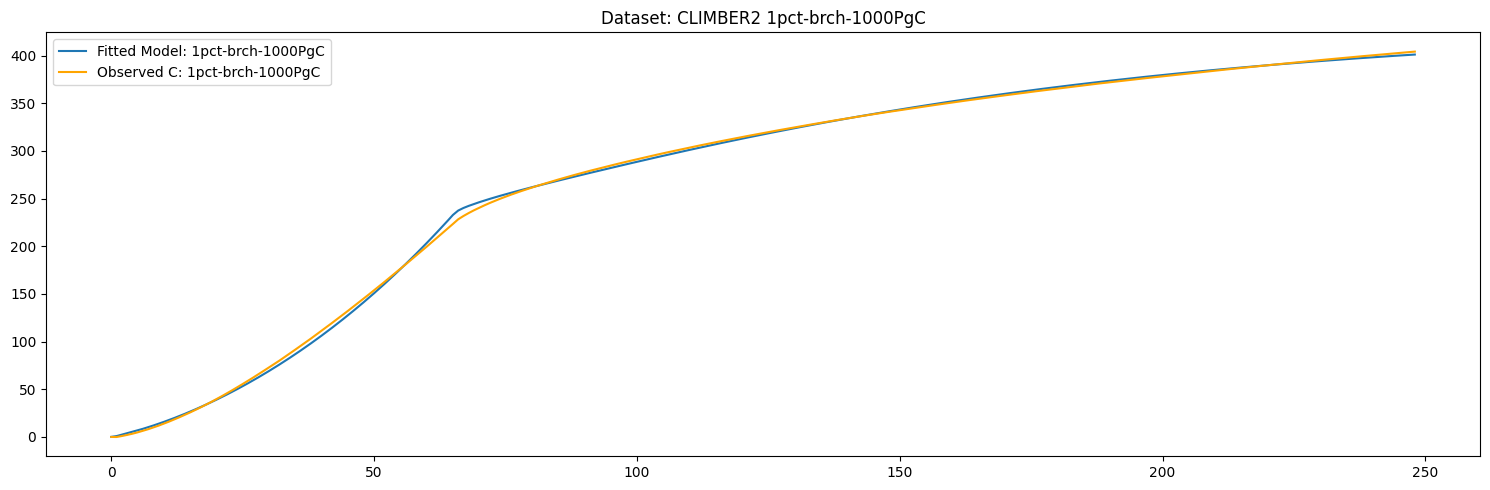

In [360]:
# Load data
datasets = ['1pct-brch-1000PgC']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/CLIMBER2/CLIMBER2_A1/fgco2_CLIMBER2_esm-1pct-brch-1000PgC_1850_2100.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/CLIMBER2/CLIMBER2_A1/co2_CLIMBER2_esm-1pct-brch-1000PgC_1850_2100.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(15, 5))


for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['CLIMBER2'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax.plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax.plot(time, C, 'orange', label=f'Observed C: {label}')
    ax.set_title(f'Dataset: CLIMBER2 {label}')
    ax.legend()
    

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Dataset: CLIMBER2')
plt.show()


Optimized d3:  64.1537770240888
Optimized q values for 1pctCO2:  0.6002862666072197 1.3226111318189389e-09 8.869825022263047e-09
Optimized d3:  0.2229150276758011
Optimized q values for 1pct-brch-1000PgC:  0.2533324527985327 2.4267851380122e-16 1.239175146789181


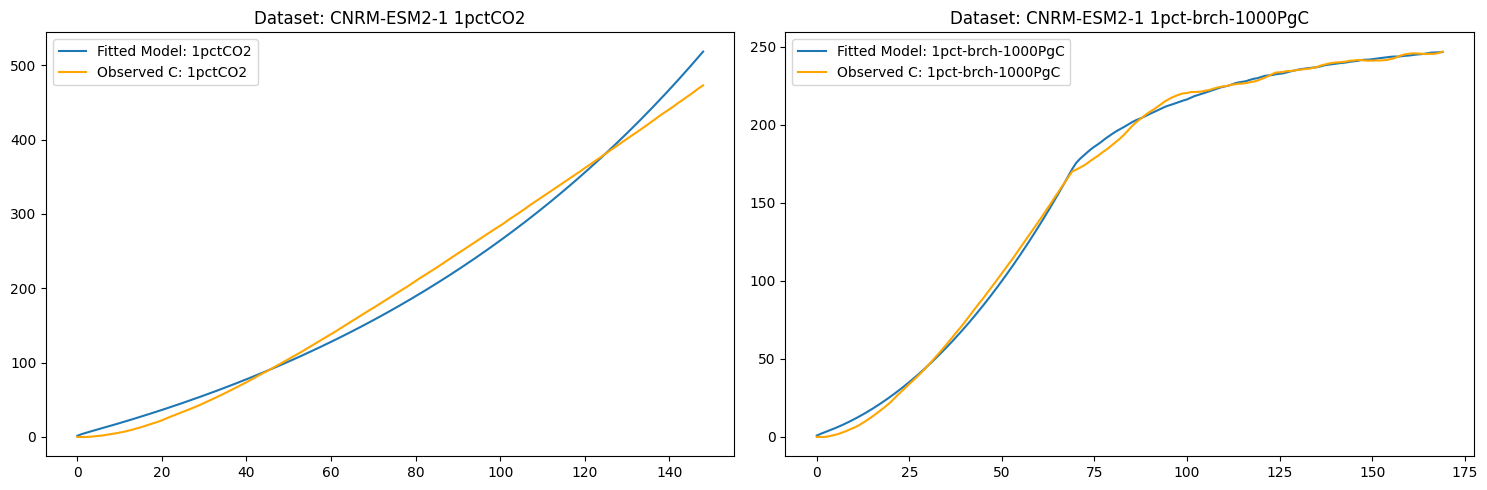

In [361]:

# Load data
datasets = ['1pctCO2', '1pct-brch-1000PgC']

fgco2 = {
    '1pctCO2': pd.read_csv('all_zecmip/CNRM-ESM2-1/CNRM_1pctCO2/fgco2_CNRM-ESM2-1_1pctCO2_r1i1p1_185001-199912.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/CNRM-ESM2-1/CNRM_ZECMIP/fgco2_CNRM-ESM2-1_esm-1pct-brch-1000PgC_r1i1p1_192001-202012.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pctCO2': pd.read_csv('all_zecmip/CNRM-ESM2-1/CNRM_1pctCO2/co2_CNRM-ESM2-1_1pctCO2_r1i1p1_185001-199912.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/CNRM-ESM2-1/CNRM_ZECMIP/co2_CNRM-ESM2-1_esm-1pct-brch-1000PgC_r1i1p1_192001-202012.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(15, 5))

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['CNRM-ESM2-1'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: CNRM-ESM2-1 {label}')
    ax[i].legend()
    

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Dataset: CNRM-ESM2-1')
plt.show()


Optimized d3:  1.733679384643316
Optimized q values for 1pct-brch-1000PgC:  9.898137611796938e-19 0.6750146384026985 5.368900263653209
Optimized d3:  2.409534007898186
Optimized q values for 1pct-brch-2000PgC:  0.30069552203204014 0.3256857175527952 5.488581324213227
Optimized d3:  1.460864927365896
Optimized q values for 1pct-brch-750PgC:  8.092231793215824e-19 0.6897926037644971 4.921402365184254
Optimized d3:  1.7309410286796814
Optimized q values for bell-1000PgC:  9.706958119019064e-18 0.6560738915663181 5.372905857596359
Optimized d3:  2.3703780994990136
Optimized q values for bell-2000PgC:  0.11204863041862789 0.4327270952469904 5.476751753888253
Optimized d3:  1.4743256003718523
Optimized q values for bell-750PgC:  2.3636060614366102e-18 0.6779149511581598 4.93123907926936


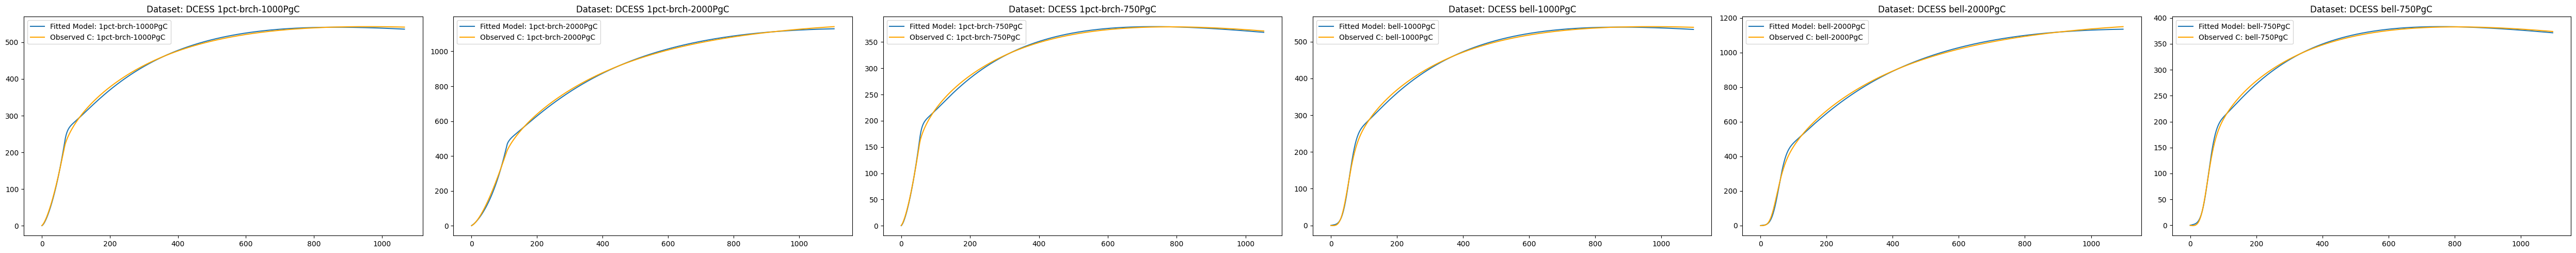

In [362]:


# Load data
datasets = ['1pct-brch-1000PgC', '1pct-brch-2000PgC', '1pct-brch-750PgC', 'bell-1000PgC', 'bell-2000PgC', 'bell-750PgC']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/DCESS/DCESS1.0_emic_1pct_brch_1000PgC/fgco2_DCESS1.0_esm-1pct-brch-1000PgC_1765-2833.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/DCESS/DCESS1.0_emic_1pct_brch_2000PgC/fgco2_DCESS1.0_esm-1pct-brch-2000PgC_1765_2874.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/DCESS/DCESS1.0_emic_1pct_brch_750PgC/fgco2_DCESS1.0_esm-1pct-brch-750PgC_1765_2820.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/DCESS/DCESS1.0_emic_bell_brch_1000PgC/fgco2_DCESS1.0_esm-bell-1000PgC_1765_2864.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/DCESS/DCESS1.0_emic_bell_brch_2000PgC/fgco2_DCESS1.0_esm-bell-2000PgC_1765_2864.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/DCESS/DCESS1.0_emic_bell_brch_750PgC/fgco2_DCESS1.0_esm-bell-750PgC_1765_2864.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/DCESS/DCESS1.0_emic_1pct_brch_1000PgC/co2_DCESS1.0_esm-1pct-brch-1000PgC_1765-2833.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/DCESS/DCESS1.0_emic_1pct_brch_2000PgC/co2_DCESS1.0_esm-1pct-brch-2000PgC_1765_2874.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/DCESS/DCESS1.0_emic_1pct_brch_750PgC/co2_DCESS1.0_esm-1pct-brch-750PgC_1765_2820.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/DCESS/DCESS1.0_emic_bell_brch_1000PgC/co2_DCESS1.0_esm-bell-1000PgC_1765_2864.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/DCESS/DCESS1.0_emic_bell_brch_2000PgC/co2_DCESS1.0_esm-bell-2000PgC_1765_2864.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/DCESS/DCESS1.0_emic_bell_brch_750PgC/co2_DCESS1.0_esm-bell-750PgC_1765_2864.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(50, 5))

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['DCESS'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: DCESS {label}')
    ax[i].legend()

# Adjust layout and show plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig('Dataset: DCESS')
plt.show()


Optimized d3:  1.212129980184968
Optimized q values for 1pct-brch-1000PgC:  1.3133790396977278e-22 0.781738091087504 5.077198816073885
Optimized d3:  1.3932429275903693
Optimized q values for 1pct-brch-2000PgC:  0.5300113947185597 0.2011455920626059 4.23277861834932
Optimized d3:  1.0809508422502097
Optimized q values for 1pct-brch-750PgC:  2.039143278665752e-19 0.7909513278863582 4.965169408560283
Optimized d3:  1.1570017882237944
Optimized q values for bell-1000PgC:  1.6641433903286865e-19 0.7535537386692744 4.957521458746446
Optimized d3:  1.35331602057207
Optimized q values for bell-2000PgC:  0.2781424926372805 0.3415207922053389 4.187294635411724
Optimized d3:  1.0623245689815277
Optimized q values for bell-750PgC:  8.200747639490211e-20 0.7815782418743552 4.944451287422335


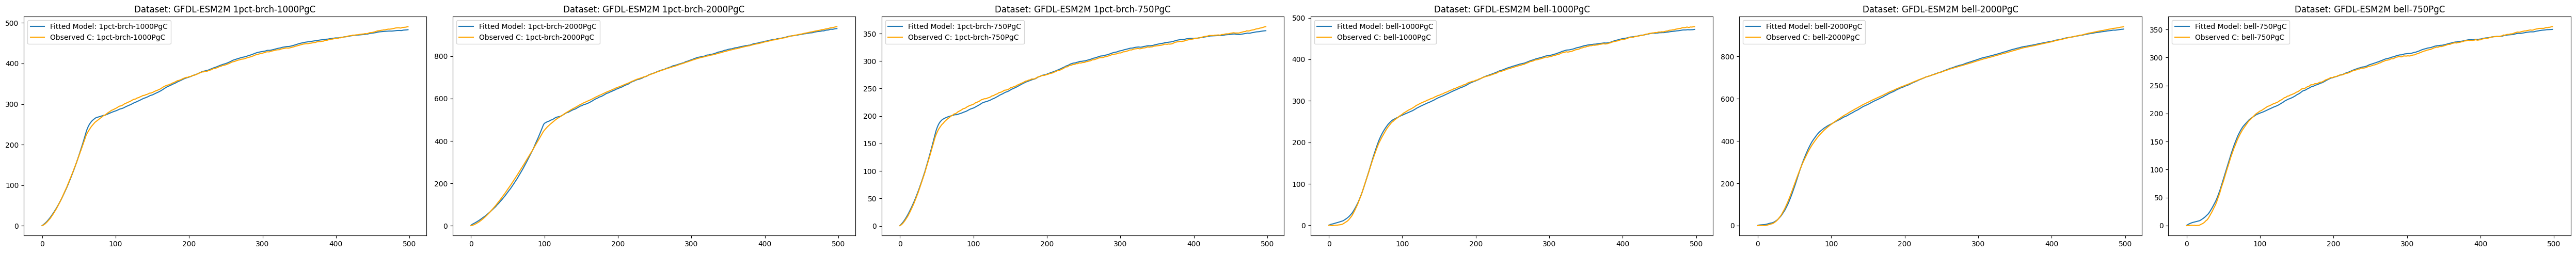

In [363]:


# Load data
datasets = ['1pct-brch-1000PgC', '1pct-brch-2000PgC', '1pct-brch-750PgC', 'bell-1000PgC', 'bell-2000PgC', 'bell-750PgC']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/GFDL-ESM2M/ZEC-MIP_data_csv/fgco2_GFDL-ESM2M_esm-1pct-brch-1000PgC_1861_2360.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/GFDL-ESM2M/ZEC-MIP_data_csv/fgco2_GFDL-ESM2M_esm-1pct-brch-2000PgC_1861_2360.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/GFDL-ESM2M/ZEC-MIP_data_csv/fgco2_GFDL-ESM2M_esm-1pct-brch-750PgC_1861_2360.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/GFDL-ESM2M/ZEC-MIP_data_csv/fgco2_GFDL-ESM2M_esm-bell-1000PgC_1861_2360.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/GFDL-ESM2M/ZEC-MIP_data_csv/fgco2_GFDL-ESM2M_esm-bell-2000PgC_1861_2360.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/GFDL-ESM2M/ZEC-MIP_data_csv/fgco2_GFDL-ESM2M_esm-bell-750PgC_1861_2360.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/GFDL-ESM2M/ZEC-MIP_data_csv/co2_GFDL-ESM2M_esm-1pct-brch-1000PgC_1861_2360.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/GFDL-ESM2M/ZEC-MIP_data_csv/co2_GFDL-ESM2M_esm-1pct-brch-2000PgC_1861_2360.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/GFDL-ESM2M/ZEC-MIP_data_csv/co2_GFDL-ESM2M_esm-1pct-brch-750PgC_1861_2360.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/GFDL-ESM2M/ZEC-MIP_data_csv/co2_GFDL-ESM2M_esm-bell-1000PgC_1861_2360.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/GFDL-ESM2M/ZEC-MIP_data_csv/co2_GFDL-ESM2M_esm-bell-2000PgC_1861_2360.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/GFDL-ESM2M/ZEC-MIP_data_csv/co2_GFDL-ESM2M_esm-bell-750PgC_1861_2360.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(50, 5))

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['GFDL-ESM2M'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: GFDL-ESM2M {label}')
    ax[i].legend()

# Adjust layout and show plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig('Dataset: GFDL-ESM2M')
plt.show()


Optimized d3:  0.5986183319686286
Optimized q values for 1pct-brch-1000PgC:  6.949696236844549e-15 0.06904744026319007 4.836391721896561
Optimized d3:  0.5176224145011618
Optimized q values for 1pct-brch-2000PgC:  4.40991652352275e-22 0.1549562315795393 3.7106351453943405
Optimized d3:  0.6150869798276324
Optimized q values for 1pct-brch-750PgC:  2.594227064320406e-17 0.04918466801016846 5.108226720559291
Optimized d3:  0.5922172733547497
Optimized q values for bell-1000PgC:  3.474286204106294e-21 0.05510360726701549 4.756633208072468
Optimized d3:  0.513012634633703
Optimized q values for bell-2000PgC:  4.513335133117852e-19 0.11689857282199163 3.7031157650107454
Optimized d3:  0.6065426000388935
Optimized q values for bell-750PgC:  1.4532584922598734e-25 0.033049367732876825 4.989631678520236


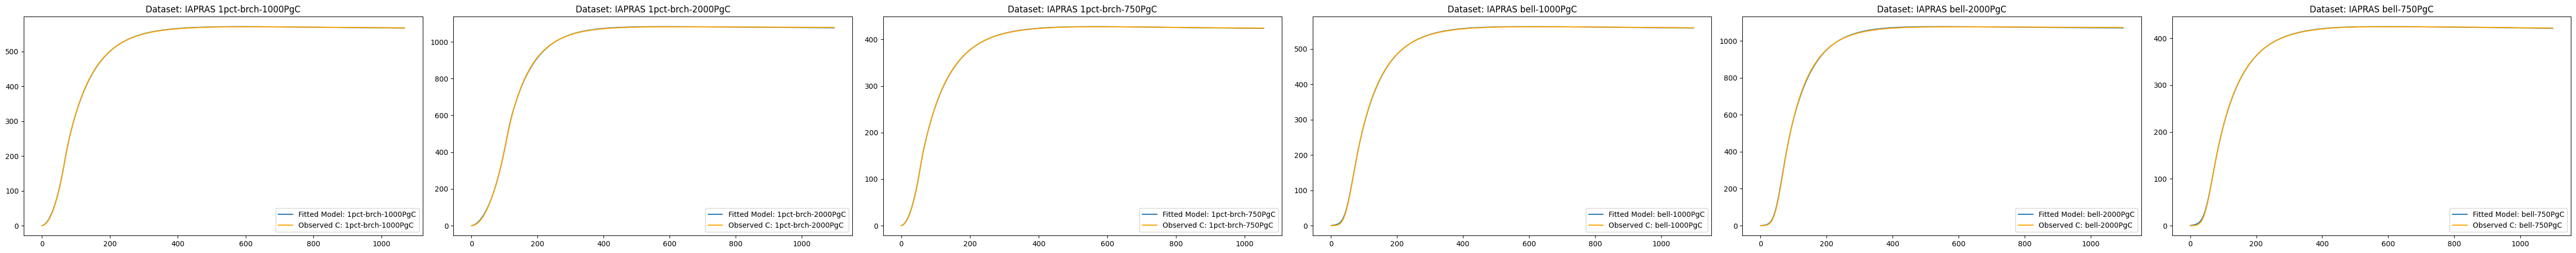

In [364]:

# Load data
datasets = ['1pct-brch-1000PgC', '1pct-brch-2000PgC', '1pct-brch-750PgC', 'bell-1000PgC', 'bell-2000PgC', 'bell-750PgC']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/IAPRAS/abrupt-1000PgC/fgco2_IAPRAS_esm-1pct-brch-1000PgC_1_1070.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/IAPRAS/abrupt-2000PgC/fgco2_IAPRAS_esm-1pct-brch-2000PgC_1_1100.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/IAPRAS/abrupt-750PgC/fgco2_IAPRAS_esm-1pct-brch-750PgC_1_1057.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/IAPRAS/bell-1000PgC/fgco2_IAPRAS_esm-bell-1000PgC_1_1100.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/IAPRAS/bell-2000PgC/fgco2_IAPRAS_esm-bell-2000PgC_1_1100.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/IAPRAS/bell-750PgC/fgco2_IAPRAS_esm-bell-750PgC_1_1100.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/IAPRAS/abrupt-1000PgC/co2_IAPRAS_esm-1pct-brch-1000PgC_1_1070.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/IAPRAS/abrupt-2000PgC/co2_IAPRAS_esm-1pct-brch-2000PgC_1_1100.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/IAPRAS/abrupt-750PgC/co2_IAPRAS_esm-1pct-brch-750PgC_1_1057.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/IAPRAS/bell-1000PgC/co2_IAPRAS_esm-bell-1000PgC_1_1100.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/IAPRAS/bell-2000PgC/co2_IAPRAS_esm-bell-2000PgC_1_1100.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/IAPRAS/bell-750PgC/co2_IAPRAS_esm-bell-750PgC_1_1100.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(50, 5))

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['IAPRAS'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: IAPRAS {label}')
    ax[i].legend()

# Adjust layout and show plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig('Dataset: IAPRAS')
plt.show()


Optimized d3:  2.123119248909702
Optimized q values for 1pct-brch-1000PgC:  5.641990437926927e-20 0.6782950342493484 5.228815114128326
Optimized d3:  1.7351023223746744
Optimized q values for 1pct-brch-750PgC:  3.6768758288386634e-19 0.6994688618245224 4.815281317051527


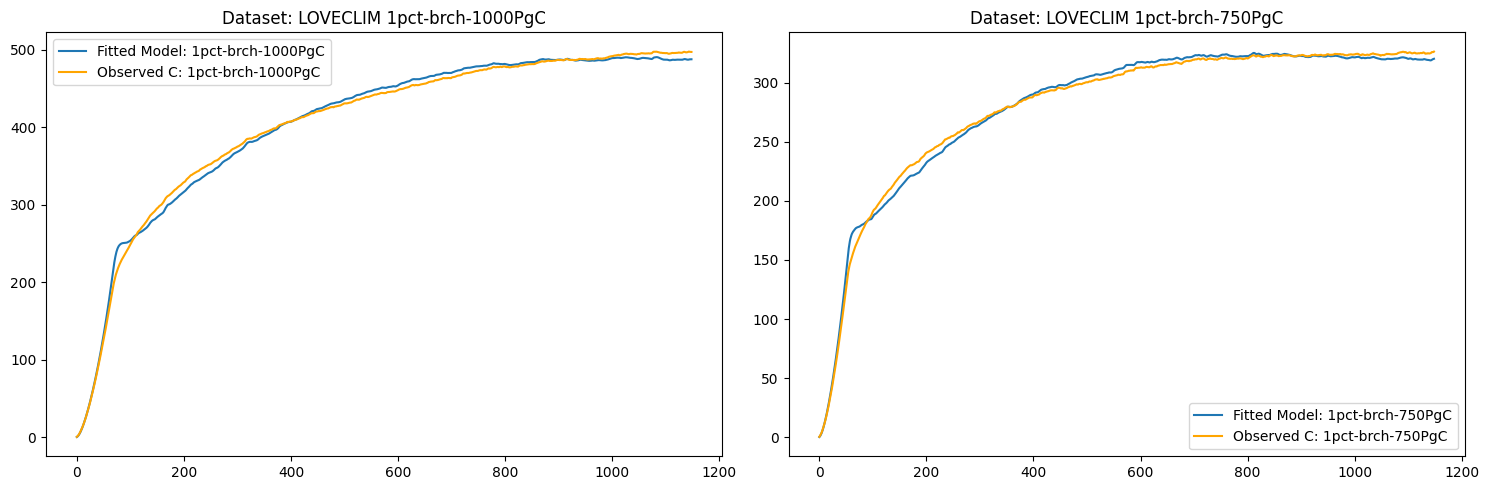

In [365]:


# Load data
datasets = ['1pct-brch-1000PgC', '1pct-brch-750PgC']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/LOVECLIM/LOVECLIM1000PgCNew/fgco2_LOVECLIM_esm-1pct-brch-1000PgC_1850-3000.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/LOVECLIM/LOVECLIM750PgCNew/fgco2_LOVECLIM_esm-1pct-brch-750PgC_1850-3000.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/LOVECLIM/LOVECLIM1000PgCNew/co2_LOVECLIM_esm-1pct-brch-1000PgC_1850-3000.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/LOVECLIM/LOVECLIM750PgCNew/co2_LOVECLIM_esm-1pct-brch-750PgC_1850-3000.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(15, 5))

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['LOVECLIM'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: LOVECLIM {label}')
    ax[i].legend()
    

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Dataset: LOVECLIM')
plt.show()


Optimized d3:  1.1087642496779837
Optimized q values for 1pct-brch-1000PgC:  4.677680166434202e-19 0.7761804358132938 5.290902627116304
Optimized d3:  1.2326523445395174
Optimized q values for 1pct-brch-2000PgC:  6.187631307588859e-19 0.7563808265177944 4.20378822939533
Optimized d3:  1.0754088138725622
Optimized q values for 1pct-brch-750PgC:  4.810941045507336e-21 0.776563642257027 5.5603162322235935
Optimized d3:  1.10373243244391
Optimized q values for bell-1000PgC:  1.1755118841135827e-18 0.747172545023213 5.307920298149459
Optimized d3:  1.2173272509178756
Optimized q values for bell-2000PgC:  6.20406035532508e-20 0.6473700907395552 4.28473267069113
Optimized d3:  1.0727390938652248
Optimized q values for bell-750PgC:  1.1752865965365198e-16 0.7647759965660066 5.561974387528112


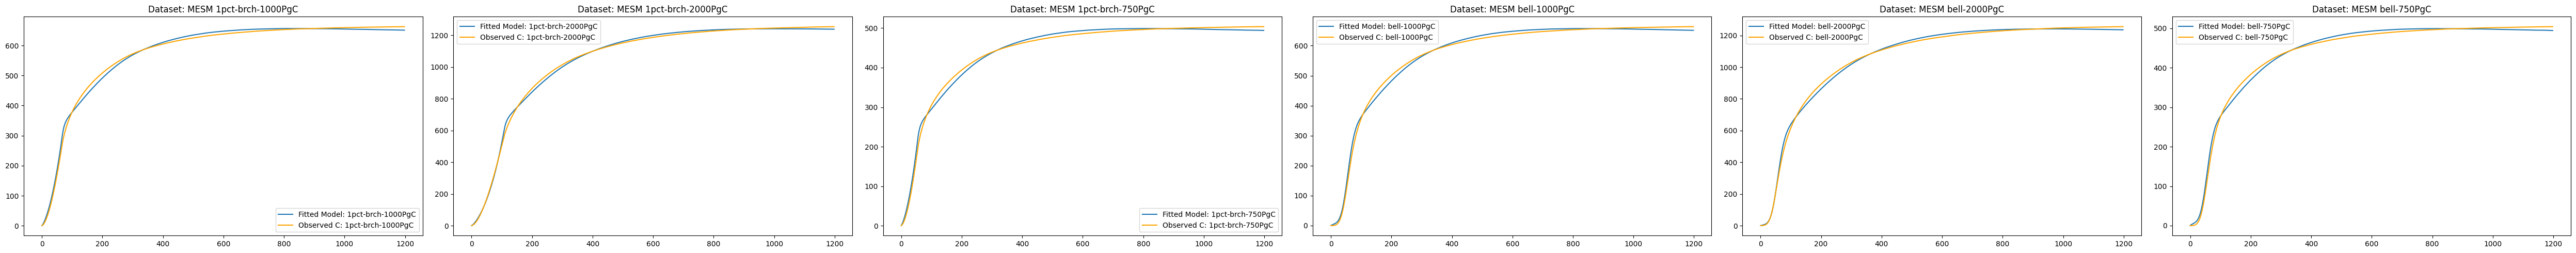

In [366]:

# Load data
datasets = ['1pct-brch-1000PgC', '1pct-brch-2000PgC', '1pct-brch-750PgC', 'bell-1000PgC', 'bell-2000PgC', 'bell-750PgC']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/MESM/Data_for_1%1000GtC/fgco2_MESM_esm-1pct-brch-1000PgC_1_1200.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/MESM/Data_for_1%2000GtC/fgco2_MESM_esm-1pct-brch-2000PgC_1_1200.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/MESM/Data_for_1%750GtC/fgco2_MESM_esm-1pct-brch-750PgC_1_1200.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/MESM/Data_for_Bell_1000/fgco2_MESM_esm-bell-1000PgC_1_1200.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/MESM/Data_for_Bell_2000/fgco2_MESM_esm-bell-2000PgC_1_1200.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/MESM/Data_for_Bell_750/fgco2_MESM_esm-bell-750PgC_1_1200.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/MESM/Data_for_1%1000GtC/co2_MESM_esm-1pct-brch-1000PgC_1_1200.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/MESM/Data_for_1%2000GtC/co2_MESM_esm-1pct-brch-2000PgC_1_1200.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/MESM/Data_for_1%750GtC/co2_MESM_esm-1pct-brch-750PgC_1_1200.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/MESM/Data_for_Bell_1000/co2_MESM_esm-bell-1000PgC_1_1200.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/MESM/Data_for_Bell_2000/co2_MESM_esm-bell-2000PgC_1_1200.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/MESM/Data_for_Bell_750/co2_MESM_esm-bell-750PgC_1_1200.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(50, 5))

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['MESM'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: MESM {label}')
    ax[i].legend()

# Adjust layout and show plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig('Dataset: MESM')
plt.show()


Optimized d3:  1.275911470617173
Optimized q values for 1pct-brch-1000PgC:  0.37702269337175487 0.31163729224083236 4.955462919840637
Optimized d3:  1.584351124981882
Optimized q values for 1pct-brch-2000PgC:  0.6645224691196966 1.2970037329294757e-16 3.6427889174306616
Optimized d3:  1.495507267740317
Optimized q values for 1pct-brch-750PgC:  0.20576207894608833 0.5113658592257481 6.321444293671149
Optimized d3:  128.1415641769128
Optimized q values for 1pctCO2:  0.8740370013777174 1.501171532129966e-10 9.673345766975268e-12


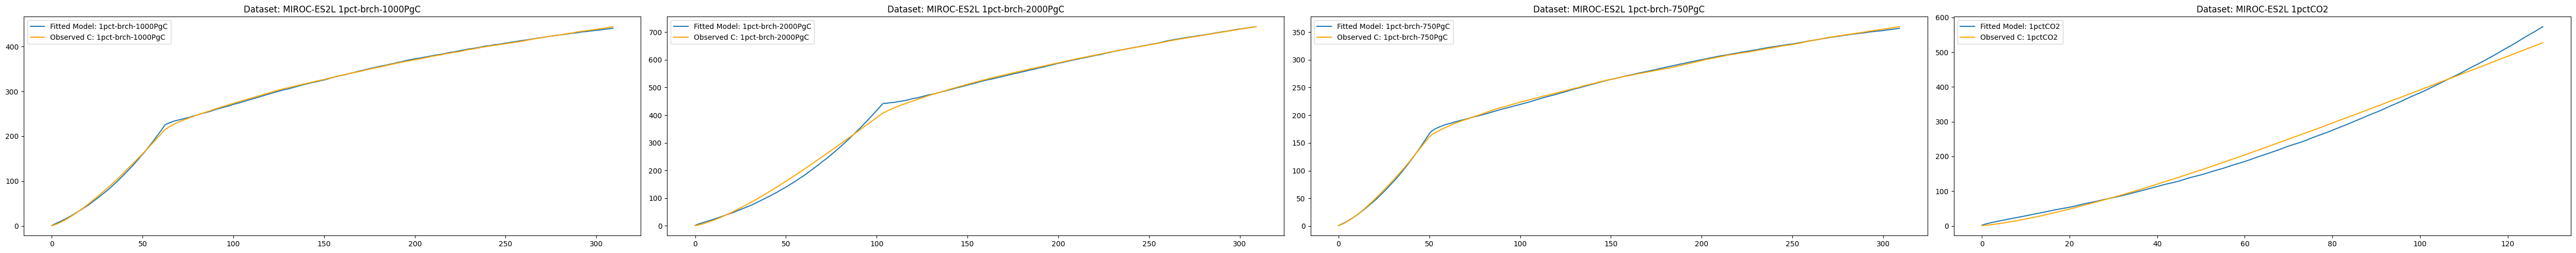

In [367]:


# Load data
datasets = ['1pct-brch-1000PgC', '1pct-brch-2000PgC', '1pct-brch-750PgC', '1pctCO2']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/MIROC-ES2L/data_MIROC-ES2L_hajima_00_190614/fgco2_MIROC-ES2L_esm-1pct-brch-1000PgC_1913_2160.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/MIROC-ES2L/data_MIROC-ES2L_hajima_00_190614/fgco2_MIROC-ES2L_esm-1pct-brch-2000PgC_1954_2160.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/MIROC-ES2L/data_MIROC-ES2L_hajima_00_190614/fgco2_MIROC-ES2L_esm-1pct-brch-750PgC_1901_2160.csv', index_col=0).to_numpy().flatten(),
    '1pctCO2': pd.read_csv('all_zecmip/MIROC-ES2L/MIROC-1pct/fgco2_MIROC-ES2L_esm-1pct-brch-1ppy_1850_1979.csv', index_col=0).to_numpy().flatten(),
    }

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/MIROC-ES2L/data_MIROC-ES2L_hajima_00_190614/co2_MIROC-ES2L_esm-1pct-brch-1000PgC_1913_2160.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/MIROC-ES2L/data_MIROC-ES2L_hajima_00_190614/co2_MIROC-ES2L_esm-1pct-brch-2000PgC_1954_2160.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/MIROC-ES2L/data_MIROC-ES2L_hajima_00_190614/co2_MIROC-ES2L_esm-1pct-brch-750PgC_1901_2160.csv', index_col=0).to_numpy().flatten(),
    '1pctCO2': pd.read_csv('all_zecmip/MIROC-ES2L/MIROC-1pct/co2_MIROC-ES2L_esm-1pct-brch-1ppy_1850_1979.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(50, 5))

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['MIROC-ES2L'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: MIROC-ES2L {label}')
    ax[i].legend()

# Adjust layout and show plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig('Dataset: MIROC-ES2L')
plt.show()


Optimized d3:  1.8266401844352826
Optimized q values for 1pct-brch-1000PgC:  1.8642553607784054e-16 0.9429369875402704 8.585341891468675
Optimized d3:  2.0896980912418086
Optimized q values for 1pct-brch-2000PgC:  0.4614473545092125 0.39298381133835475 7.4560907449891936
Optimized d3:  1.7695224993333827
Optimized q values for 1pct-brch-750PgC:  1.6957095928586233e-21 0.9752720872111972 8.833308983720778
Optimized d3:  1.818845020591676
Optimized q values for bell-1000PgC:  2.5420233120503803e-16 0.9246138500239947 8.592352958256754
Optimized d3:  2.109195470746385
Optimized q values for bell-2000PgC:  0.15082109043293668 0.5937137174863857 7.513508813088672
Optimized d3:  1.770130621868245
Optimized q values for bell-750PgC:  1.5155441624483184e-21 0.9744271292545702 8.837365142613818


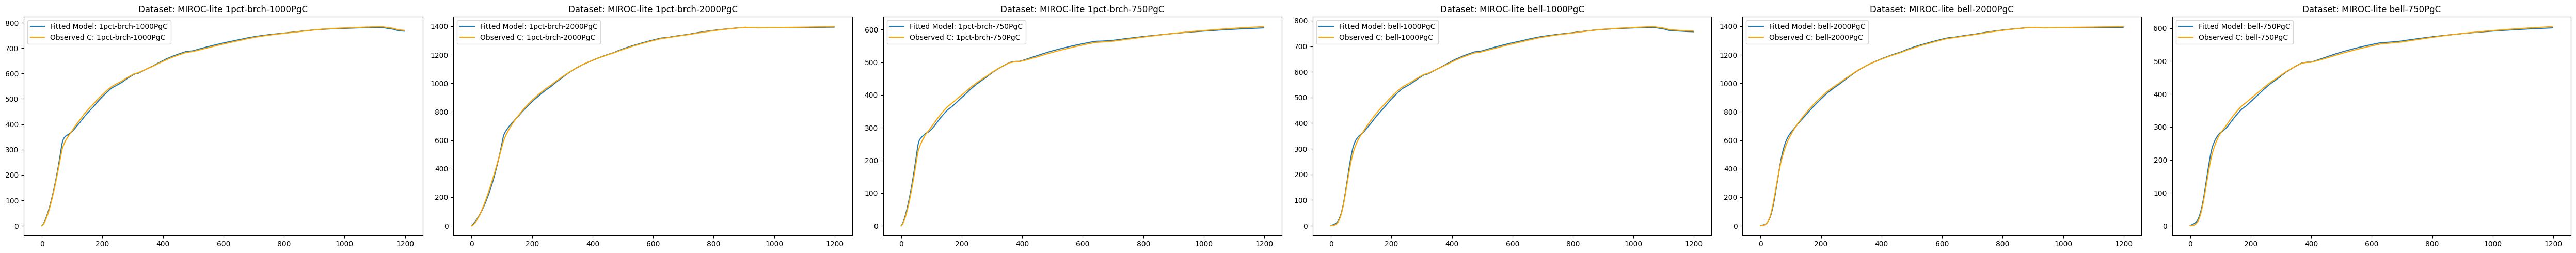

In [368]:

# Load data
datasets = ['1pct-brch-1000PgC', '1pct-brch-2000PgC', '1pct-brch-750PgC', 'bell-1000PgC', 'bell-2000PgC', 'bell-750PgC']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/MIROC-lite/A1_zec_1000PgC/fgco2_MIROC-lite-LCM_esm-1pct-brch-1000PgC_66-1200.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/MIROC-lite/A2_zec_750PgC/fgco2_MIROC-lite-LCM_esm-1pct-brch-750PgC_54-1200.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/MIROC-lite/A3_zec_2000PgC/fgco2_MIROC-lite-LCM_esm-1pct-brch-2000PgC_106-1200.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/MIROC-lite/B1_bellshape_1000PgC/fgco2_MIROC-lite-LCM_esm-bell-1000PgC_1-1200.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/MIROC-lite/B2_bellshape_750PgC/fgco2_MIROC-lite-LCM_esm-bell-750PgC_1-1200.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/MIROC-lite/B3_bellshape_2000PgC/fgco2_MIROC-lite-LCM_esm-bell-2000PgC_1-1200.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/MIROC-lite/A1_zec_1000PgC/co2_MIROC-lite-LCM_esm-1pct-brch-1000PgC_66-1200.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/MIROC-lite/A2_zec_750PgC/co2_MIROC-lite-LCM_esm-1pct-brch-750PgC_54-1200.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/MIROC-lite/A3_zec_2000PgC/co2_MIROC-lite-LCM_esm-1pct-brch-2000PgC_106-1200.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/MIROC-lite/B1_bellshape_1000PgC/co2_MIROC-lite-LCM_esm-bell-1000PgC_1-1200.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/MIROC-lite/B2_bellshape_750PgC/co2_MIROC-lite-LCM_esm-bell-750PgC_1-1200.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/MIROC-lite/B3_bellshape_2000PgC/co2_MIROC-lite-LCM_esm-bell-2000PgC_1-1200.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(50, 5))

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['MIROC-lite'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: MIROC-lite {label}')
    ax[i].legend()

# Adjust layout and show plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig('Dataset: MIROC-lite')
plt.show()


Optimized d3:  0.7515270418161699
Optimized q values for 1pct-brch-1000PgC:  0.4219416451951185 0.1956185683182923 3.588369839352495


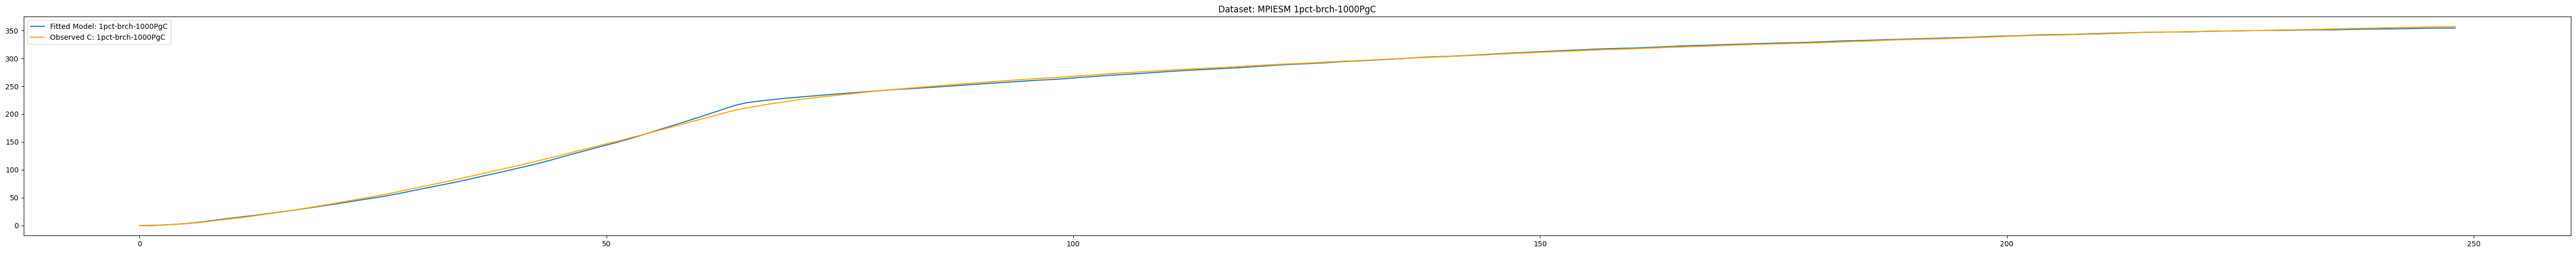

In [369]:


# Load data
datasets = ['1pct-brch-1000PgC']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/MPIESM/MPIESM_A1/fgco2_MPIESM_esm-1pct-brch-1000PgC_1850-2099.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/MPIESM/MPIESM_A1/co2_MPIESM_esm-1pct-brch-1000PgC_1850-2099.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(50, 5))

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]*-1
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['MPIESM'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax.plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax.plot(time, C, 'orange', label=f'Observed C: {label}')
    ax.set_title(f'Dataset: MPIESM {label}')
    ax.legend()

# Adjust layout and show plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig('Dataset: MPIESM')
plt.show()


Optimized d3:  0.5270168117110796
Optimized q values for 1pct-brch-1000PgC:  0.4734732169763287 0.08014472887922929 2.9814793805802142
Optimized d3:  0.5463635891007824
Optimized q values for bell-1000PgC:  0.5813797266068369 0.008233289522210235 3.105116586233354
Optimized d3:  0.7897806356134655
Optimized q values for bell-2000PgC:  0.5097648184626244 3.471943835406697e-18 2.59295466365735


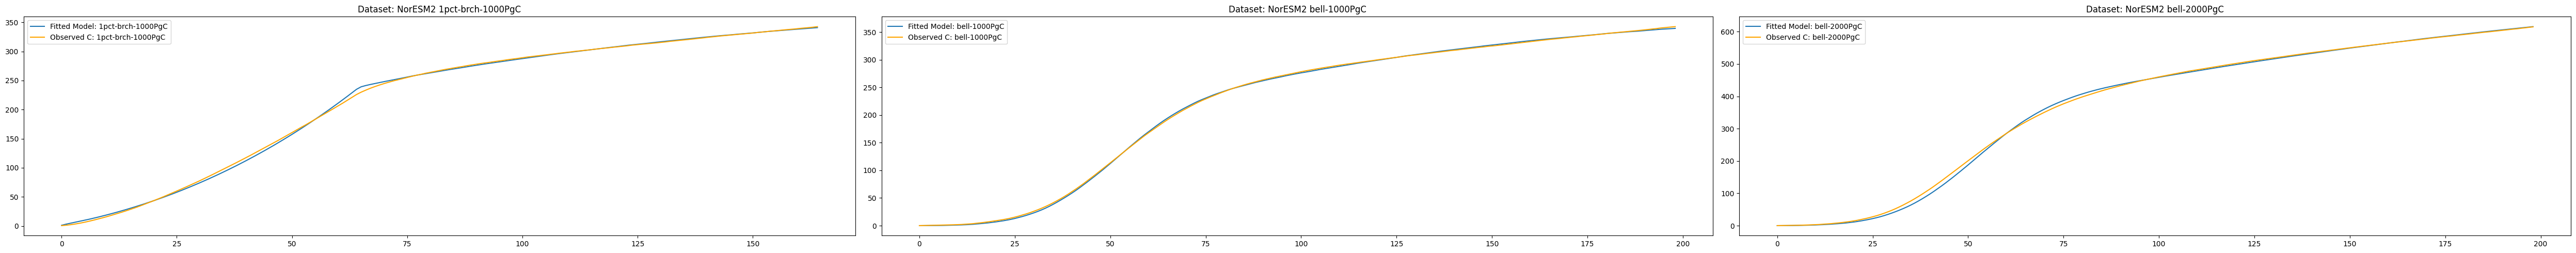

In [370]:

# Load data
datasets = ['1pct-brch-1000PgC', 'bell-1000PgC', 'bell-2000PgC']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/NorESM2/NorESM2-A1/fgco2_NorESM2-LM_esm-1pct-brch-1000PgC_0066-0167.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/NorESM2/NorESM2-B1/fgco2_NorESM2-LM_esm-bell-1000PgC_1850-2049.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/NorESM2/NorESM2-B3/fgco2_NorESM2-LM_esm-bell-2000PgC_1850-2049.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/NorESM2/NorESM2-A1/co2_NorESM2-LM_esm-1pct-brch-1000PgC_0066-0167.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/NorESM2/NorESM2-B1/co2_NorESM2-LM_esm-bell-1000PgC_1850-2049.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/NorESM2/NorESM2-B3/co2_NorESM2-LM_esm-bell-2000PgC_1850-2049.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(50, 5))


for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['NorESM2'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: NorESM2 {label}')
    ax[i].legend()

# Adjust layout and show plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig('Dataset: NorESM2')
plt.show()


Optimized d3:  0.9833588426465909
Optimized q values for 1pct-brch-1000PgC:  0.25102989793392066 0.4938065718192627 6.794750345359678
Optimized d3:  1.270952136129767
Optimized q values for 1pct-brch-2000PgC:  0.7058796961144198 0.08244096161643633 5.399748999430644
Optimized d3:  1.1022033135030604
Optimized q values for 1pct-brch-750PgC:  0.09249568100775168 0.6876532347417132 8.03309936225913
Optimized d3:  0.9894852848650166
Optimized q values for bell-1000PgC:  0.21430450518763108 0.5253275031265345 6.782492626400725
Optimized d3:  1.3112086268131535
Optimized q values for bell-2000PgC:  0.34178961934127655 0.3130482554627553 5.485002115808982
Optimized d3:  0.8706115879242451
Optimized q values for bell-750PgC:  0.47807172489625904 0.204461794226841 7.193791112764487


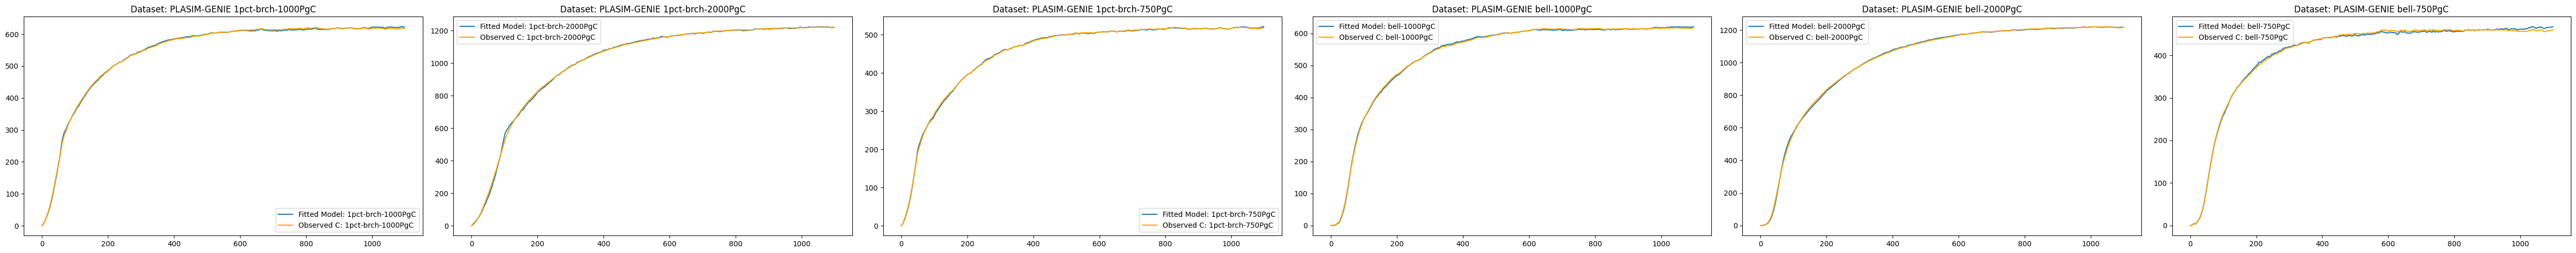

In [371]:


# Load data
datasets = ['1pct-brch-1000PgC', '1pct-brch-2000PgC', '1pct-brch-750PgC', 'bell-1000PgC', 'bell-2000PgC', 'bell-750PgC']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/PLASIM-GENIE/ZEC_OUTPUT/fgco2_PLASIM-GENIE_esm-1pct-brch-1000PgC_0001_1100.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/PLASIM-GENIE/ZEC_OUTPUT/fgco2_PLASIM-GENIE_esm-1pct-brch-2000PgC_0001_1100.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/PLASIM-GENIE/ZEC_OUTPUT/fgco2_PLASIM-GENIE_esm-1pct-brch-750PgC_0001_1100.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/PLASIM-GENIE/ZEC_OUTPUT/fgco2_PLASIM-GENIE_esm-bell-1000PgC_0001_1100.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/PLASIM-GENIE/ZEC_OUTPUT/fgco2_PLASIM-GENIE_esm-bell-2000PgC_0001_1100.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/PLASIM-GENIE/ZEC_OUTPUT/fgco2_PLASIM-GENIE_esm-bell-750PgC_0001_1100.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/PLASIM-GENIE/ZEC_OUTPUT/co2_PLASIM-GENIE_esm-1pct-brch-1000PgC_0001_1100.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/PLASIM-GENIE/ZEC_OUTPUT/co2_PLASIM-GENIE_esm-1pct-brch-2000PgC_0001_1100.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/PLASIM-GENIE/ZEC_OUTPUT/co2_PLASIM-GENIE_esm-1pct-brch-750PgC_0001_1100.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/PLASIM-GENIE/ZEC_OUTPUT/co2_PLASIM-GENIE_esm-bell-1000PgC_0001_1100.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/PLASIM-GENIE/ZEC_OUTPUT/co2_PLASIM-GENIE_esm-bell-2000PgC_0001_1100.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/PLASIM-GENIE/ZEC_OUTPUT/co2_PLASIM-GENIE_esm-bell-750PgC_0001_1100.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(50, 5))

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['PLASIM-GENIE'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: PLASIM-GENIE {label}')
    ax[i].legend()

# Adjust layout and show plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig('Dataset: PLASIM-GENIE')
plt.show()


Optimized d3:  0.433329046976864
Optimized q values for 1pct-brch-1000PgC:  0.4391679356938978 0.17009499315507173 1.89956768266274
Optimized d3:  3321.384686547214
Optimized q values for 1pct-brch-2000PgC:  0.6992223760267327 7.688396291585272e-32 4891.87645695771
Optimized d3:  0.37361290605360525
Optimized q values for 1pct-brch-750PgC:  0.3010520231087799 0.2943517332861999 1.9632055370681152
Optimized d3:  64.29752168356453
Optimized q values for 1pctCO2:  0.7934920825957383 9.141860906777396e-11 1.8716439080278106e-09


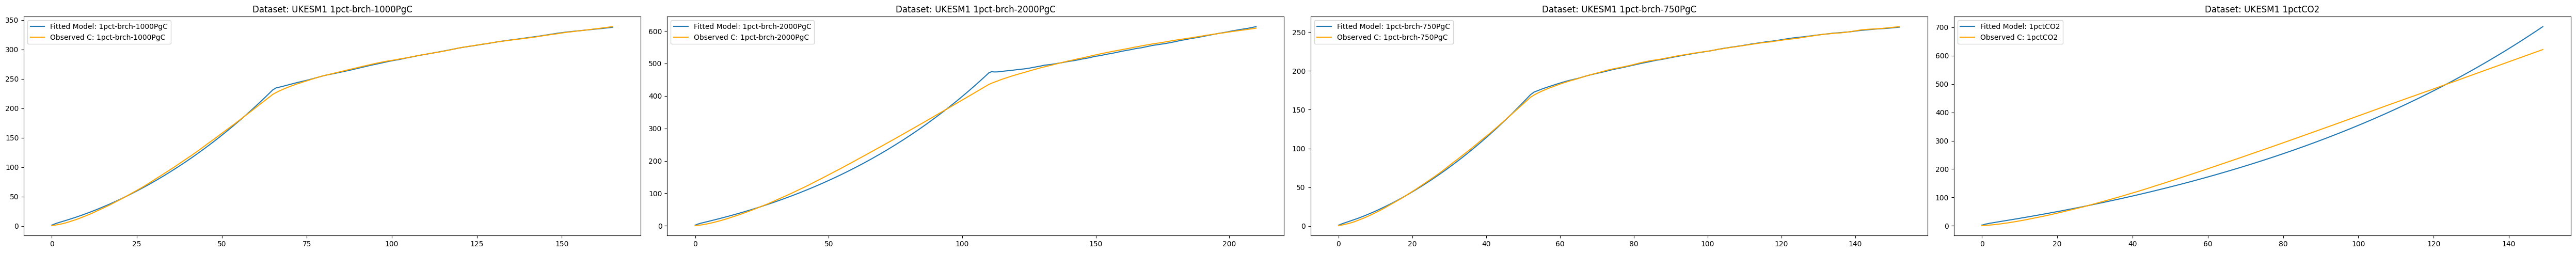

In [372]:

# Load data
datasets = ['1pct-brch-1000PgC', '1pct-brch-2000PgC', '1pct-brch-750PgC', '1pctCO2']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/UKESM1/UKESM1_esm-1pct-brch-1000PgC/fgco2_UKESM1_esm-1pct-brch-1000PgC_1917_2016.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/UKESM1/UKESM1_esm-1pct-brch-2000PgC/fgco2_UKESM1_esm-1pct-brch-2000PgC_1962_2061.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/UKESM1/UKESM1_esm-1pct-brch-750PgC/fgco2_UKESM1_esm-1pct-brch-750PgC_1904_2003.csv', index_col=0).to_numpy().flatten(),
    '1pctCO2': pd.read_csv('all_zecmip/UKESM1/UKESM1_1pctCO2/fgco2_UKESM1_1pctCO2_1851_2000.csv', index_col=0).to_numpy().flatten(),

}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/UKESM1/UKESM1_esm-1pct-brch-1000PgC/co2_UKESM1_esm-1pct-brch-1000PgC_1917_2016.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/UKESM1/UKESM1_esm-1pct-brch-2000PgC/co2_UKESM1_esm-1pct-brch-2000PgC_1962_2061.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/UKESM1/UKESM1_esm-1pct-brch-750PgC/co2_UKESM1_esm-1pct-brch-750PgC_1904_2003.csv', index_col=0).to_numpy().flatten(),
    '1pctCO2': pd.read_csv('all_zecmip/UKESM1/UKESM1_1pctCO2/co2_UKESM1_1pctCO2_1851_2000.csv', index_col=0).to_numpy().flatten(),

}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(50, 5))

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['UKESM1'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: UKESM1 {label}')
    ax[i].legend()

# Adjust layout and show plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig('Dataset: UKESM1')
plt.show()


Optimized d3:  1.1306196468555376
Optimized q values for 1pct-brch-1000PgC:  1.807842067827994e-21 0.8747111228701732 3.454710346236442
Optimized d3:  1.3463656210962085
Optimized q values for 1pct-brch-2000PgC:  0.5093506416014565 0.28194488162765635 2.4398242567165234
Optimized d3:  1.0914857068639723
Optimized q values for 1pct-brch-750PgC:  1.4193268564211551e-15 0.8952235665179133 3.842544384797198
Optimized d3:  1.118520452314208
Optimized q values for bell-1000PgC:  1.7547897649017052e-19 0.847547390395043 3.4557231951842966
Optimized d3:  1.3219342022244644
Optimized q values for bell-2000PgC:  0.07367470897463928 0.5934037152382519 2.481151937998284
Optimized d3:  1.0873524448520815
Optimized q values for bell-750PgC:  1.6241749274045353e-21 0.8887871727750132 3.834154207965687
Optimized d3:  1.5694494315265928e-10
Optimized q values for 1pctCO2:  5.836673708785689e-10 6.088897587557632e-14 0.8646753988356827


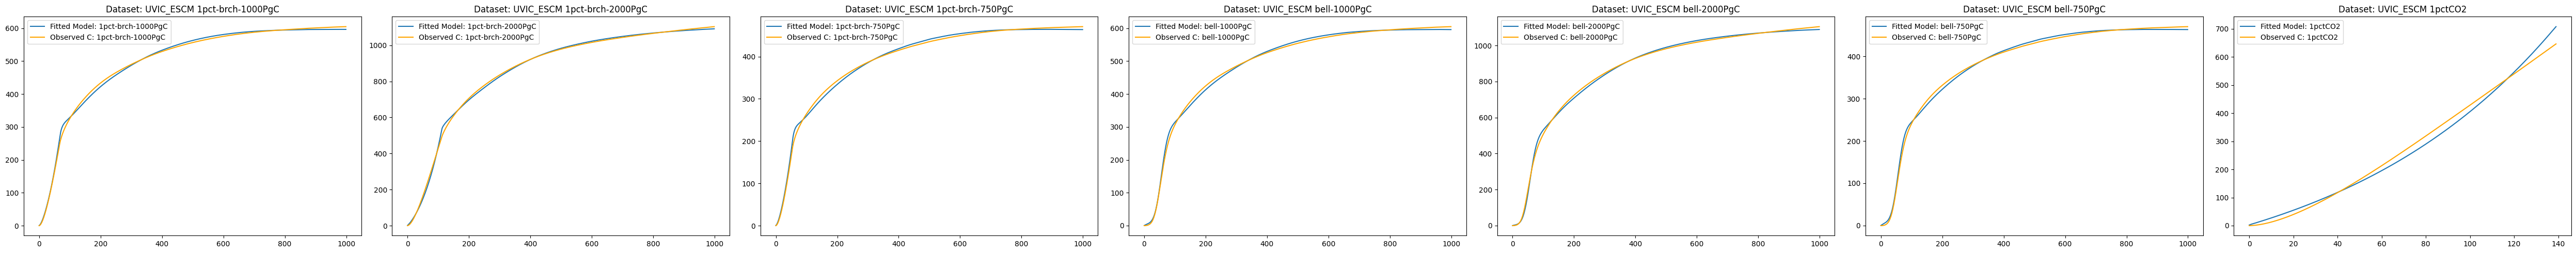

In [373]:


# Load data
datasets = ['1pct-brch-1000PgC', '1pct-brch-2000PgC', '1pct-brch-750PgC', 'bell-1000PgC', 'bell-2000PgC', 'bell-750PgC', '1pctCO2']

fgco2 = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/fgco2_UVicESCM2.10_esm-1pct-brch-1000PgC_1850-3049.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/fgco2_UVicESCM2.10_esm-bell-2000PgC_1850-3049.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/fgco2_UVicESCM2.10_esm-bell-750PgC_1850-3049.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/fgco2_UVicESCM2.10_esm-bell-1000PgC_1850-3049.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/fgco2_UVicESCM2.10_esm-1pct-brch-2000PgC_1850-3049.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/fgco2_UVicESCM2.10_esm-1pct-brch-750PgC_1850-3049.csv', index_col=0).to_numpy().flatten(),
    '1pctCO2': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/fgco2_UVicESCM2.10_1pct_bench_1850-1989.csv', index_col=0).to_numpy().flatten(),
}

conc = {
    '1pct-brch-1000PgC': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/co2_UVicESCM2.10_esm-1pct-brch-1000PgC_1850-3049.csv', index_col=0).to_numpy().flatten(),
    'bell-2000PgC': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/co2_UVicESCM2.10_esm-bell-2000PgC_1850-3049.csv', index_col=0).to_numpy().flatten(),
    'bell-750PgC': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/co2_UVicESCM2.10_esm-bell-750PgC_1850-3049.csv', index_col=0).to_numpy().flatten(),
    'bell-1000PgC': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/co2_UVicESCM2.10_esm-bell-1000PgC_1850-3049.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-2000PgC': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/co2_UVicESCM2.10_esm-1pct-brch-2000PgC_1850-3049.csv', index_col=0).to_numpy().flatten(),
    '1pct-brch-750PgC': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/co2_UVicESCM2.10_esm-1pct-brch-750PgC_1850-3049.csv', index_col=0).to_numpy().flatten(),
    '1pctCO2': pd.read_csv('all_zecmip/UVIC_ESCM/UVic_ESCM/co2_UVicESCM2.10_1pct_bench_1850-1989.csv', index_col=0).to_numpy().flatten(),
}

# Set up subplots for plotting
fig, ax = plt.subplots(1, len(datasets), figsize=(50, 5))

for i, label in enumerate(datasets):
    fgco2_data = fgco2[label]
    C = np.cumsum(fgco2_data)

    conc_data = conc[label]
    time = np.arange(len(conc_data))
    
    # Ensure consistent length for fitting
    min_length = min(len(C), len(conc_data))
    C = C[:min_length]
    conc_data = conc_data[:min_length]
    time = time[:min_length]

    # Fit the curve
    popt, pcov = curve_fit(lambda t, alpha, beta, gamma, delta: only_leave_params_to_be_set(t, alpha, beta, gamma, delta, conc_data), 
                       time, C, p0=p0, bounds=bounds)
    # Optimized parameters
    alpha_opt, beta_opt, gamma_opt, delta_opt = popt
    
    q1, q2, q3 = 0.2 * alpha_opt, 0.3 * beta_opt, 0.4 * gamma_opt
    d3 = delta_opt
    print("Optimized d3: ", d3)
    print(f"Optimized q values for {label}: ", q1, q2, q3)
    
    # Append q values to the DataFrame
    new_q_values = pd.DataFrame({
        'Dataset': ['UVIC_ESCM'],
        'Experiment': [label],
        'q1': [q1],
        'q2': [q2],
        'q3': [q3],
        'd3': [d3]
    })
    
    # Concatenate the new q values to the main q_values_df DataFrame
    q_values_df = pd.concat([q_values_df, new_q_values], ignore_index=True)
    # Output C with optimized parameters
    C_output_optimized = only_leave_params_to_be_set(time, alpha_opt, beta_opt, gamma_opt, delta_opt, conc_data)

    # Plot the fitted curve and observed data
    ax[i].plot(time, C_output_optimized, label=f'Fitted Model: {label}')
    ax[i].plot(time, C, 'orange', label=f'Observed C: {label}')
    ax[i].set_title(f'Dataset: UVIC_ESCM {label}')
    ax[i].legend()

# Adjust layout and show plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig('Dataset: UVIC_ESCM')
plt.show()


In [374]:
# Drop duplicate rows
q_values_df = q_values_df.drop_duplicates(keep='first')

# Print the cleaned DataFrame
print(q_values_df)

q_values_df.to_csv('q_values.csv', index=False)

      Dataset         Experiment            q1            q2            q3  \
0     CanESM5  1pct-brch-1000PgC  3.896808e-01  1.873118e-01  1.849820e+00   
1     CanESM5  1pct-brch-2000PgC  6.255809e-01  6.800819e-15  1.959528e+00   
2      ACCESS            1pctCO2  8.980709e-01  6.726725e-11  1.255190e-09   
3      ACCESS  1pct-brch-1000PgC  5.048380e-01  1.556997e-01  2.034332e+00   
4      ACCESS   1pct-brch-750PgC  2.768787e-01  3.794247e-01  2.121098e+00   
..        ...                ...           ...           ...           ...   
62  UVIC_ESCM   1pct-brch-750PgC  1.419327e-15  8.952236e-01  3.842544e+00   
63  UVIC_ESCM       bell-1000PgC  1.754790e-19  8.475474e-01  3.455723e+00   
64  UVIC_ESCM       bell-2000PgC  7.367471e-02  5.934037e-01  2.481152e+00   
65  UVIC_ESCM        bell-750PgC  1.624175e-21  8.887872e-01  3.834154e+00   
66  UVIC_ESCM            1pctCO2  5.836674e-10  6.088898e-14  8.646754e-01   

              d3  
0   3.575678e-01  
1   7.071583e-01  
2   6.

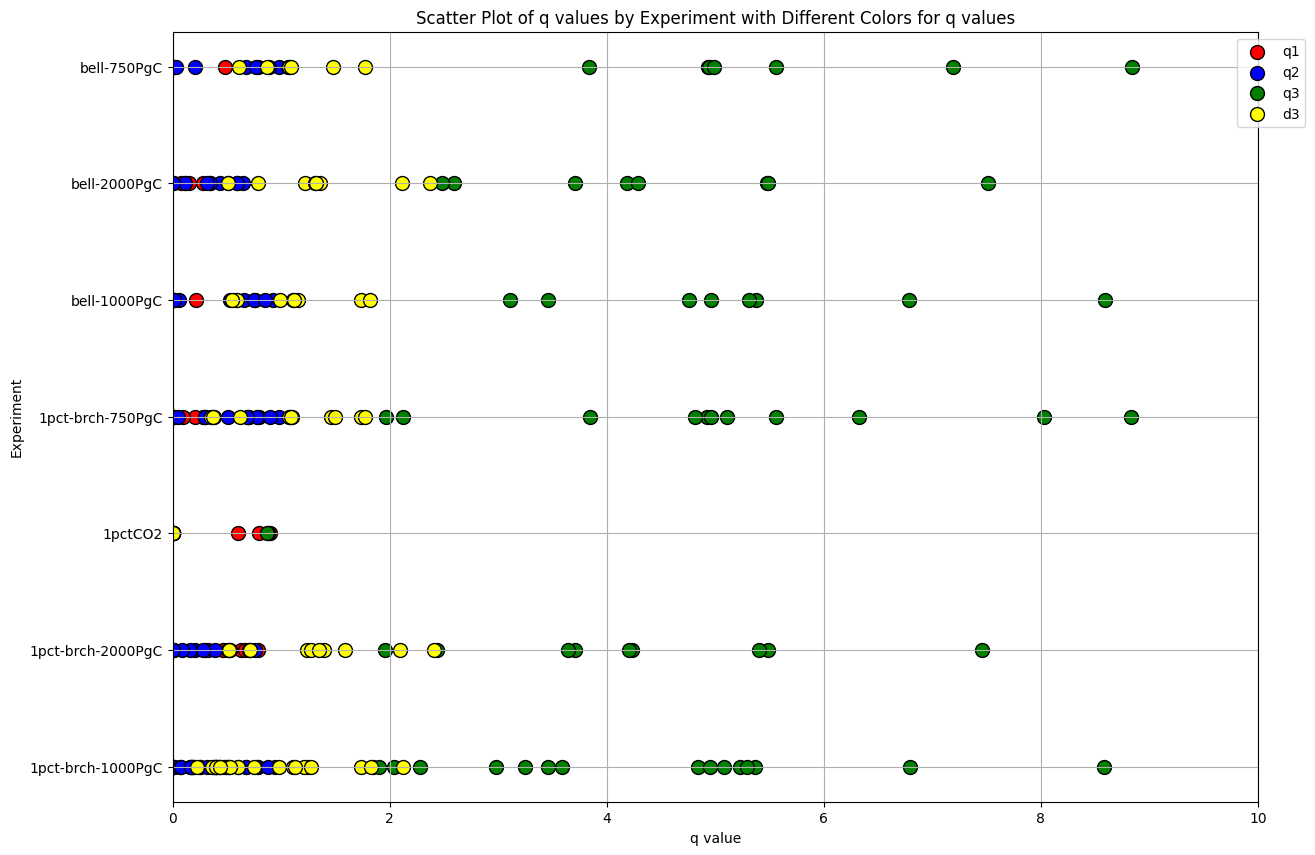

0.4438973888888889 0.4922230178571429 4.638338163934426 405.27020099999993
0.047753141384073015 0.09158444143969058 3.7347880950340056 0.2911520740493153


In [375]:
# Melt the DataFrame to have q values in one column
df_melted = q_values_df.melt(id_vars=['Dataset', 'Experiment'], value_vars=['q1', 'q2', 'q3', 'd3'],
                    var_name='q_value', value_name='value')

# Define colors for each q value
q_colors = {
    'q1': 'red',
    'q2': 'blue',
    'q3': 'green',
    'd3': 'yellow'
}

# Plotting
plt.figure(figsize=(14, 10))

# Plot each q value with its respective color
for q_val, color in q_colors.items():
    subset = df_melted[df_melted['q_value'] == q_val]
    plt.scatter(subset['value'], subset['Experiment'], 
                marker='o', color=color, 
                s=100,  # Size of scatter points
                label=q_val,
                edgecolor='k')

plt.xlabel('q value')
plt.ylabel('Experiment')
plt.title('Scatter Plot of q values by Experiment with Different Colors for q values')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.xlim(0, 10)
plt.grid(True)
plt.savefig('Q Diagram (and d3)')
plt.show()

#calculate mean and variance of each (no further removals)

q_values_df[q_values_df[['q1','q2','q3','d3']] > 10] = np.nan

q_values_df = q_values_df.round(decimals=6)

q_values_df = q_values_df.replace(0, np.nan)

# i am very tired rn, please check i am not being stupid with statistical rules

d3 = q_values_df.loc[:, 'd3']

q1_mean = q_values_df.loc[:, 'q1'].mean()
q2_mean = q_values_df.loc[:, 'q2'].mean()
q3_mean = q_values_df.loc[:, 'q3'].mean()
d3_mean = d3.mean()*355

q1_var = ((q_values_df.loc[:, 'q1'])).var()
q2_var = ((q_values_df.loc[:, 'q2'])).var()
q3_var = ((q_values_df.loc[:, 'q3'])).var()
d3_var = d3.var()

print(q1_mean, q2_mean, q3_mean, d3_mean)
print(q1_var, q2_var, q3_var, d3_var)

In [376]:
# q1 = 0.180 q2 = 0.297 q3 = 0.386 d3 = 355 in original